In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
350841,2020-07-20,Perry,Arkansas,5105.0,39,0
338687,2020-07-16,Clarke,Iowa,19039.0,151,3
495049,2020-09-02,Bailey,Texas,48017.0,202,4
338766,2020-07-16,Worth,Iowa,19195.0,32,0
567388,2020-09-25,Unknown,Georgia,NaN,2223,7
265790,2020-06-23,Woodford,Illinois,17203.0,33,2
340144,2020-07-16,Mercer,Pennsylvania,42085.0,208,6
556554,2020-09-21,Cochran,Texas,48079.0,48,1
209470,2020-06-05,Baker,Florida,12003.0,29,4
422983,2020-08-11,Shelby,Missouri,29205.0,38,0


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
261660,2020-06-21,Albemarle,Virginia,51003.0,334,8,13.0,6.86
376020,2020-07-27,Albemarle,Virginia,51003.0,718,10,13.0,12.86
501807,2020-09-04,Albemarle,Virginia,51003.0,1067,19,7.0,9.29
328004,2020-07-12,Charlottesville city,Virginia,51540.0,276,7,6.0,5.57
224320,2020-06-09,Charlottesville city,Virginia,51540.0,141,3,2.0,1.86
340778,2020-07-16,Charlottesville city,Virginia,51540.0,318,7,0.0,9.57
369616,2020-07-25,Charlottesville city,Virginia,51540.0,412,8,7.0,10.14
347157,2020-07-18,Albemarle,Virginia,51003.0,608,10,15.0,10.71
404971,2020-08-05,Albemarle,Virginia,51003.0,791,16,1.0,9.57
472705,2020-08-26,Albemarle,Virginia,51003.0,980,17,5.0,8.43


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
3060,".Dodge County, Wisconsin",87839.0,Dodge,Wisconsin
521,".Terrell County, Georgia",8531.0,Terrell,Georgia
2054,".Clark County, Ohio",134083.0,Clark,Ohio
2825,".Appomattox County, Virginia",15911.0,Appomattox,Virginia
1677,".Dawson County, Nebraska",23595.0,Dawson,Nebraska
2852,".Franklin County, Virginia",56042.0,Franklin,Virginia
70,".Bethel Census Area, Alaska",18386.0,Bethel Census Area,Alaska
3084,".Marinette County, Wisconsin",40350.0,Marinette,Wisconsin
1958,".Pamlico County, North Carolina",12726.0,Pamlico,North Carolina
2101,".Morrow County, Ohio",35328.0,Morrow,Ohio


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
186,2020-09-23,Albemarle,Virginia,51003.0,1203,21,1.0,8.29,".Albemarle County, Virginia",109330.0,7.582548
187,2020-09-24,Albemarle,Virginia,51003.0,1215,21,12.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
188,2020-09-25,Albemarle,Virginia,51003.0,1233,21,18.0,10.71,".Albemarle County, Virginia",109330.0,9.796030
189,2020-09-26,Albemarle,Virginia,51003.0,1253,21,20.0,11.14,".Albemarle County, Virginia",109330.0,10.189335
190,2020-09-27,Albemarle,Virginia,51003.0,1255,21,2.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
191,2020-09-28,Albemarle,Virginia,51003.0,1274,21,19.0,10.71,".Albemarle County, Virginia",109330.0,9.796030
192,2020-09-29,Albemarle,Virginia,51003.0,1283,21,9.0,11.57,".Albemarle County, Virginia",109330.0,10.582640
193,2020-09-30,Albemarle,Virginia,51003.0,1306,21,23.0,14.71,".Albemarle County, Virginia",109330.0,13.454678
194,2020-10-01,Albemarle,Virginia,51003.0,1321,21,15.0,15.14,".Albemarle County, Virginia",109330.0,13.847983
195,2020-10-02,Albemarle,Virginia,51003.0,1337,21,16.0,14.86,".Albemarle County, Virginia",109330.0,13.591878


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
386,2020-09-23,Charlottesville city,Virginia,51540.0,1105,28,12.0,24.29,".Charlottesville city, Virginia",47266.0,51.390006
387,2020-09-24,Charlottesville city,Virginia,51540.0,1119,28,14.0,22.57,".Charlottesville city, Virginia",47266.0,47.751026
388,2020-09-25,Charlottesville city,Virginia,51540.0,1144,28,25.0,17.57,".Charlottesville city, Virginia",47266.0,37.172598
389,2020-09-26,Charlottesville city,Virginia,51540.0,1186,28,42.0,19.71,".Charlottesville city, Virginia",47266.0,41.700165
390,2020-09-27,Charlottesville city,Virginia,51540.0,1216,28,30.0,20.71,".Charlottesville city, Virginia",47266.0,43.815851
391,2020-09-28,Charlottesville city,Virginia,51540.0,1222,28,6.0,19.57,".Charlottesville city, Virginia",47266.0,41.403969
392,2020-09-29,Charlottesville city,Virginia,51540.0,1233,28,11.0,20.00,".Charlottesville city, Virginia",47266.0,42.313714
393,2020-09-30,Charlottesville city,Virginia,51540.0,1246,29,13.0,20.14,".Charlottesville city, Virginia",47266.0,42.609910
394,2020-10-01,Charlottesville city,Virginia,51540.0,1274,29,28.0,22.14,".Charlottesville city, Virginia",47266.0,46.841281
395,2020-10-02,Charlottesville city,Virginia,51540.0,1298,29,24.0,22.00,".Charlottesville city, Virginia",47266.0,46.545085


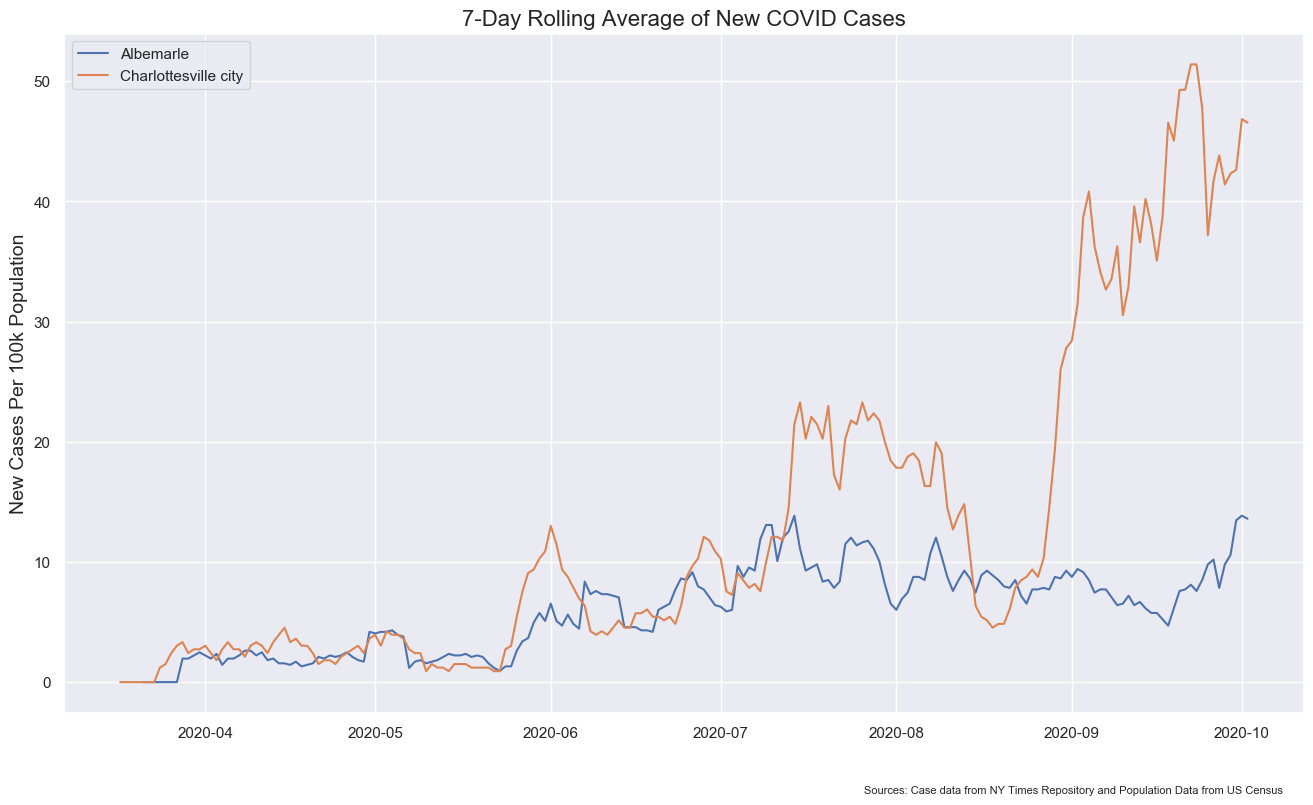

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')